# Text Processing

## Capturing Text Data

### Plain Text

In [1]:
import os

# Read in a plain text file
with open(os.path.join("data", "hieroglyph.txt"), "r") as f:
    text = f.read()
    print(text)

Hieroglyphic writing dates from c. 3000 BC, and is composed of hundreds of symbols. A hieroglyph can represent a word, a sound, or a silent determinative; and the same symbol can serve different purposes in different contexts. Hieroglyphs were a formal script, used on stone monuments and in tombs, that could be as detailed as individual works of art.



### Tabular Data

In [2]:
import pandas as pd

# Extract text column from a dataframe
df = pd.read_csv(os.path.join("data", "news.csv"))
df.head()[['publisher', 'title']]

# Convert text column to lowercase
df['title'] = df['title'].str.lower()
df.head()[['publisher', 'title']]

,publisher,title
0,Livemint,fed's charles plosser sees high bar for change...
1,IFA Magazine,us open: stocks fall after fed official hints ...
2,IFA Magazine,"fed risks falling 'behind the curve', charles ..."
3,Moneynews,fed's plosser: nasty weather has curbed job gr...
4,NASDAQ,plosser: fed may have to accelerate tapering pace


### Online Resource

In [3]:
import requests
import json

# Fetch data from a REST API
r = requests.get(
    "https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent=4))

# Extract relevant object and field
q = res["contents"]["quotes"][0]
print(q["quote"], "\n--", q["author"])

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "If we\u2019re not stretching, we\u2019re not growing. If we\u2019re not growing, we\u2019re probably not fulfilling our potential. The only person in this room that knows your potential is you.",
                "length": "173",
                "author": "Kevin Turner ",
                "tags": [
                    "comfort-zone",
                    "growth",
                    "inspire"
                ],
                "category": "inspire",
                "date": "2017-07-31",
                "permalink": "https://theysaidso.com/quote/uZl4zvREAf71Q6XfbAs8aweF/kevin-turner-if-were-not-stretching-were-not-growing-if-were-not-growing-were-pr",
                "title": "Inspiring Quote of the day",
                "background": "https://theysaidso.com/img/bgs/man_on_the_mountain.jpg",
                "id": "uZl4zvREAf71Q6XfbAs8aweF"
            }
        ],
   

## Cleaning

In [12]:
import requests

# Fetch a web page
r = requests.get("https://www.udacity.com/courses/all")
print(r.text)

<!DOCTYPE html><html><head><meta charset="utf-8"><title>优达学城 (Udacity) - 传授硅谷的名企官方课程 | Udacity</title><base href="/"><meta name="viewport" content="width=device-width,initial-scale=1"><link rel="icon" type="image/x-icon" href="favicon.ico"><link href="styles.d769e23fdfeefa02d5d8.bundle.css" rel="stylesheet"><style ng-transition="my-app-id">html[_ngcontent-c0] {
  box-sizing: border-box; }

*[_ngcontent-c0], *[_ngcontent-c0]::after, *[_ngcontent-c0]::before {
  box-sizing: inherit; }

a[_ngcontent-c0] {
  color: darkviolet; }

body[_ngcontent-c0] {
  color: #028bb1; }

[_nghost-c0] {
  display: block;
  position: relative; }</style><style ng-transition="my-app-id">html[_ngcontent-c1] {
  box-sizing: border-box; }

*[_ngcontent-c1], *[_ngcontent-c1]::after, *[_ngcontent-c1]::before {
  box-sizing: inherit; }

.invisible[_ngcontent-c1] {
  visibility: hidden !important; }

.hide[_ngcontent-c1] {
  display: none !important; }

.show[_ngcontent-c1] {
  display: block !important; }

.sr-only

In [17]:
import re

# Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
#print(pattern.sub('', r.text))  # replace them with blank
notag_text = re.sub('<[^<]+?>', '', r.text)
print(notag_text)

优达学城 (Udacity) - 传授硅谷的名企官方课程 | Udacityhtml[_ngcontent-c0] {
  box-sizing: border-box; }

*[_ngcontent-c0], *[_ngcontent-c0]::after, *[_ngcontent-c0]::before {
  box-sizing: inherit; }

a[_ngcontent-c0] {
  color: darkviolet; }

body[_ngcontent-c0] {
  color: #028bb1; }

[_nghost-c0] {
  display: block;
  position: relative; }html[_ngcontent-c1] {
  box-sizing: border-box; }

*[_ngcontent-c1], *[_ngcontent-c1]::after, *[_ngcontent-c1]::before {
  box-sizing: inherit; }

.invisible[_ngcontent-c1] {
  visibility: hidden !important; }

.hide[_ngcontent-c1] {
  display: none !important; }

.show[_ngcontent-c1] {
  display: block !important; }

.sr-only[_ngcontent-c1] {
  height: 1px;
  width: 1px;
  overflow: hidden;
  position: absolute !important;
  clip: rect(1px, 1px, 1px, 1px); }

.hidden-xs-up[_ngcontent-c1] {
  display: none !important; }

@media (max-width: 479px) {
  .hidden-xs-down[_ngcontent-c1] {
    display: none !important; } }

@media (min-width: 480px) {
  .hidden-sm-up[_ngc

In [21]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text)
print(soup.get_text())

/Users/xingdu/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/xingdu/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


优达学城 (Udacity) - 传授硅谷的名企官方课程 | Udacityhtml[_ngcontent-c0] {
  box-sizing: border-box; }

*[_ngcontent-c0], *[_ngcontent-c0]::after, *[_ngcontent-c0]::before {
  box-sizing: inherit; }

a[_ngcontent-c0] {
  color: darkviolet; }

body[_ngcontent-c0] {
  color: #028bb1; }

[_nghost-c0] {
  display: block;
  position: relative; }html[_ngcontent-c1] {
  box-sizing: border-box; }

*[_ngcontent-c1], *[_ngcontent-c1]::after, *[_ngcontent-c1]::before {
  box-sizing: inherit; }

.invisible[_ngcontent-c1] {
  visibility: hidden !important; }

.hide[_ngcontent-c1] {
  display: none !important; }

.show[_ngcontent-c1] {
  display: block !important; }

.sr-only[_ngcontent-c1] {
  height: 1px;
  width: 1px;
  overflow: hidden;
  position: absolute !important;
  clip: rect(1px, 1px, 1px, 1px); }

.hidden-xs-up[_ngcontent-c1] {
  display: none !important; }

@media (max-width: 479px) {
  .hidden-xs-down[_ngcontent-c1] {
    display: none !important; } }

@media (min-width: 480px) {
  .hidden-sm-up[_ngc

In [22]:
# Find all course summaries
summaries = soup.find_all("div", class_="course-summary-card")

print(len(summaries))
summaries[0]

190


<div _ngcontent-c73="" class="course-summary-card row row-gap-medium">
<div _ngcontent-c73="" class="col-sm-3">
<div _ngcontent-c73="" class="row">
<div _ngcontent-c73="" class="col-xs-8 col-xs-offset-2 col-sm-12 col-sm-offset-0">
<a _ngcontent-c73="">
<img _ngcontent-c73="" alt="机器人开发（英文）" class="img-responsive img-bordered center-block" height="170" src="https://s3.cn-north-1.amazonaws.com.cn/static-assets/nd209-image.png" width="290"/>
</a>
</div>
</div>
</div>
<div _ngcontent-c73="" class="col-sm-9">
<div _ngcontent-c73="" class="row">
<div _ngcontent-c73="" class="col-sm-8">
<h3 _ngcontent-c73="" class="h-slim">
<a _ngcontent-c73=""> 机器人开发（英文）</a>
<span _ngcontent-c73="" class="badges">
<!-- --><span _ngcontent-c73="" class="badge badge-squared badge-new text-uppercase">New</span>
</span>
</h3>
</div>
<div _ngcontent-c73="" class="col-sm-4 hidden-xs">
<!-- --><span _ngcontent-c73="" class="caption text-right">
<span _ngcontent-c73="" class="icon-level course-info-bar-icon icon-lev

In [23]:
# Extract title
summaries[0].select_one("h3 a").get_text().strip()

'机器人开发（英文）'

In [42]:
# Extract description
summaries[0].select_one("p").get_text().strip()

'通过虚拟环境和实际硬件上的实战项目，掌握机器人开发核心技能。利用机器人的力量，以创新和有益的方式扩展人类的能力，把我们的世界变得更好。'

In [43]:
# Find all course summaries, extract title and description
courses = []
summaries = soup.find_all("div", class_="course-summary-card")
for summary in summaries:
    title = summary.select_one("h3 a").get_text().strip()
    if (summary.select_one("p")):
        description = summary.select_one("p").get_text().strip()
    courses.append((title, description))

print(len(courses), "course summaries found. Sample:")
for i in range(15):
    print(courses[i][0])
    print(courses[i][1])

190 course summaries found. Sample:
机器人开发（英文）
通过虚拟环境和实际硬件上的实战项目，掌握机器人开发核心技能。利用机器人的力量，以创新和有益的方式扩展人类的能力，把我们的世界变得更好。
深度学习（中/英）
人工智能正以颠覆性的方式改变这个世界，而在背后推动这场进步的，是深度学习。优达学城和深度学习专家 Siraj Raval 一起，为你带来这门充满活力的深度学习课程。你将通过丰富的课程材料，独家实战项目和专家代码审阅，学习深度学习的基础知识。
人工智能工程师（英文）
学习人工智能基础知识，以及如何运用人工智能来解决复杂的问题。
无人驾驶车工程师（英文）
无人驾驶车将改变我们生活的方方面面，这项革命性的技术代表着机器人学、机器学习、软件工程和机械工程最前沿技术的集合。在这个纳米学位项目中，你将学习和掌握世界顶尖工程企业的无人驾驶车研究团队正在使用的技术和技能。
机器学习（入门）
现今每个人的工作都和数据息息相关，无论是数据分析、机器学习、深度学习、人工智能还是无人驾驶汽车，都需要坚实的编程、数学和统计基础。万事开头难，我们希望这个纳米学位能够帮你迈开数据科学职业生涯坚实的第一步。
机器学习（进阶）
机器学习标志着计算机科学、数据分析、软件工程和人工智能领域内的重大技术突破。AlphaGo 战胜人类围棋冠军、人脸识别、大数据挖掘，都和机器学习密切相关。这个项目将教你如何成为一名机器学习工程师，并将预测模型应用于金融、医疗、教育等领域内的大数据处理。
数据分析（入门）
打下扎实基础，掌握数据分析的基础方法
数据分析（进阶）
掌握数据分析的最佳实践，迈出职业第一步。
前端开发（入门）
学习网页开发的基本原理和应用知识，完成一系列实战项目，为成为一名前端工程师打下基础！
前端开发（进阶）
进一步夯实你的前端开发高级技能，完成一系列实战项目，成为一名独当一面的前端工程师！
编程入门（中/英）
欢迎来到编程的世界。在这个面向初学者的课程里，你将学习编程基础理论与技能，通过实战项目打下扎实基础，并了解下一步你有哪些职业选择。不论是你最终的目标是成为前端工程师、移动开发者、还是数据分析师，编程入门基石纳米学位都是一个很棒的起点。
Android 开发（进阶）
如果你已经有了自己的 Android 应用，正打算把应用做得更好。那么这门课正是你所

## Normalization

### Case Normalization

In [50]:
# Sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [51]:
# Convert to lowercase
text = text.lower() 
print(text)

dr. smith graduated from the university of washington. he later started an analytics firm called lux, which catered to enterprise customers.


### Punctuation Removal

In [52]:
import re

# Remove punctuation characters
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

dr  smith graduated from the university of washington  he later started an analytics firm called lux  which catered to enterprise customers 


## Tokenization

In [53]:
# Split text into tokens (words)
words = text.split()
print(words)

['dr', 'smith', 'graduated', 'from', 'the', 'university', 'of', 'washington', 'he', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'lux', 'which', 'catered', 'to', 'enterprise', 'customers']


### NLTK: Natural Language ToolKit

In [48]:
# Another sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [49]:
from nltk.tokenize import word_tokenize

# Split text into words using NLTK
words = word_tokenize(text)
print(words)

['Dr.', 'Smith', 'graduated', 'from', 'the', 'University', 'of', 'Washington', '.', 'He', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'Lux', ',', 'which', 'catered', 'to', 'enterprise', 'customers', '.']


In [54]:
from nltk.tokenize import sent_tokenize

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

['dr  smith graduated from the university of washington  he later started an analytics firm called lux  which catered to enterprise customers']


In [55]:
# List stop words
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [56]:
# Reset text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [57]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


## Part-of-Speech Tagging

In [58]:
from nltk import pos_tag

# Tag parts of speech (PoS)
sentence = word_tokenize("I always lie down to tell a lie.")
pos_tag(sentence)

[('I', 'PRP'),
 ('always', 'RB'),
 ('lie', 'VBP'),
 ('down', 'RP'),
 ('to', 'TO'),
 ('tell', 'VB'),
 ('a', 'DT'),
 ('lie', 'NN'),
 ('.', '.')]

### Sentence Parsing

In [59]:
import nltk

# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
parser = nltk.ChartParser(my_grammar)

# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


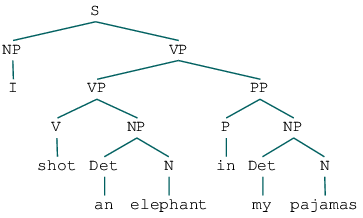

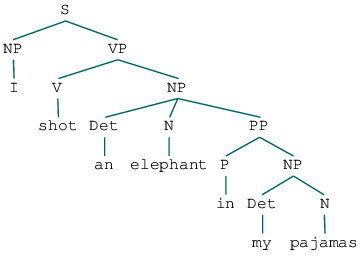

In [61]:
import IPython  # for displaying parse trees inline

# Visualize parse trees
for tree in parser.parse(sentence):
    IPython.display.display(tree)  # instead of tree.draw()

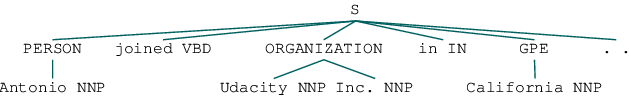

In [62]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

# Recognize named entities in a tagged sentence
tree = ne_chunk(pos_tag(word_tokenize("Antonio joined Udacity Inc. in California.")))
IPython.display.display(tree)

## Stemming & Lemmatization

### Stemming

In [63]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


### Lemmatization

In [64]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [65]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']
